In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import pandas as pd
import time

# Criando a Matrix 

In [122]:
#%%time
def rocha(N, p=0):
    #Condição que permita N ser apenas ímpar*
    if N % 2 == 0: N = N+1
    #Rocha será a matrix N por N
    rocha, m = np.zeros((N,N))    ,    int((N-1)/2)
    
    # Monta a matriz conforme a probabilidade escolhida. Sendo quanto mais poros mais perto de p=1
    for i in range(N):
        for j in range(N):
            if random.random() > p: rocha[i,j] = 1
            else: rocha[i,j] = 0
    #--------------------------------------#
    
    #Condição inicial de fluído no meio
    if p == 1: rocha[m,m] = 1
    else: rocha[m,m] = 0
    return rocha


In [123]:
#Matrix index vai criar uma matrix com os index da matrix rocha, somente para valores diferente de 0, 
# no caso só usa index para valores igual a 1
def matrix_index(N, p):
    matrixindex = []
    M = rocha(N, p)
    for (i,j), x in np.ndenumerate(M):
        if M[i,j] != 0:
            matrixindex.append([i,j])
    return M , np.array(matrixindex)

# Clusters

In [147]:
%%time
def Clusters(N, p):
    Matrix = matrix_index(N, p)
    rock = Matrix[0]
    onecluster,first = True, 0
    m_path = []
    clus = []
    count = 1
    lc = (Matrix[1]).tolist()
    
    while first ==0: 
        m = [random.choice(lc)]
        
        if rock[m[0][0],m[0][1]] < 2:
            rock[m[0][0],m[0][1]] = 2
            lc.remove([m[0][0],m[0][1]])
            
            while onecluster:
                for i in range(len(m)):
                    l,c = m[i][0] , m[i][1]
                    if m[i][0] != 0 and rock[m[i][0]-1,m[i][1]] != 0 and rock[m[i][0]-1,m[i][1]] != 2: #Linha zero
                        rock[m[i][0]-1,m[i][1]] = 2
                        m_path.append([m[i][0]-1,m[i][1]])
                        lc.remove([m[i][0]-1,m[i][1]])
                        count +=1
        
                    if m[i][1] != N-1 and rock[m[i][0],m[i][1]+1] != 0 and rock[m[i][0],m[i][1]+1] != 2:
                        rock[m[i][0],m[i][1]+1] = 2
                        m_path.append([m[i][0],m[i][1]+1])
                        lc.remove([l,c+1])
                        count +=1
                
                    if m[i][0] != N-1 and rock[m[i][0]+1,m[i][1]] != 0 and rock[m[i][0]+1,m[i][1]] != 2: #Linha zero
                        rock[m[i][0]+1,m[i][1]] = 2
                        m_path.append([m[i][0]+1,m[i][1]])
                        lc.remove([l+1,c])
                        count +=1
                
                    if m[i][1] != 0 and rock[m[i][0],m[i][1]-1] != 0 and rock[m[i][0],m[i][1]-1] != 2:
                        rock[m[i][0],m[i][1]-1] = 2
                        m_path.append([m[i][0],m[i][1]-1])
                        lc.remove([l,c-1])
                        count +=1
   
                if len(m_path) == 0: 
                    onecluster = False
               
                m = m_path 
                m_path = []
            
            clus.append(count)
            count = 1
            onecluster = True
            if len(lc) == 0: 
                first = 1
    
    clusters = np.sort(clus)
    Hist = np.histogram(clusters, bins=clusters[-1]-1)
    return rock, clusters, Hist

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11 µs


In [167]:
ini = time.time()
A = Clusters(51, 0.6)
fim = time.time()
print(fim-ini)
A

0.030520915985107422


(array([[0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 2.],
        [0., 0., 0., ..., 0., 2., 0.],
        ...,
        [0., 2., 2., ..., 0., 0., 0.],
        [2., 2., 0., ..., 0., 0., 2.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,

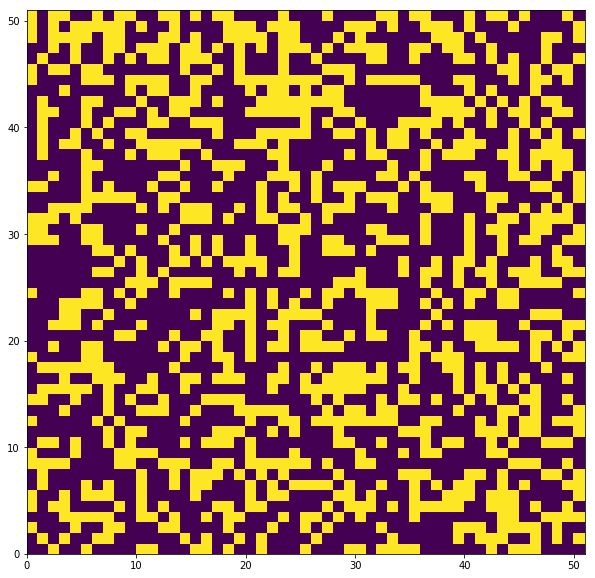

In [163]:
def Plot(N, p): 
    plt.figure(figsize=(10,10)) 
    plt.pcolormesh(A[0])
    plt.show()
    return 
Plot(0,0)